# Momentum Dataset Explorer
* see if converted annotation is correct
* check why the AP is so low when testing against openvino person detectors.


In [35]:
import json

basenm='MMTPerson200329_Ch004'
imgroot='./{}/{}/'.format( basenm,basenm)
f = open(basenm +'.json')
tdict = json.load(f)


In [36]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_annos = len(tdict['annotations'])
n_images = len(tdict['images'])
df = pd.DataFrame({
    "images": [ n_images],
    "annotations": [n_annos],    
}, columns=['images', 'annotations'])

df.head()




,images,annotations
0,724,724


In [55]:
def find_image_by_annotation(anot):
    imgid = anot['image_id']
    for imgh in tdict['images']:
        if imgh['id']==imgid:
            return imgh
    return None

def find_imgfn_by_annotation(anot):
    imgdict = find_image_by_annotation(anot)
    return imgroot+imgdic['file_name']

## Create cross reference between annotations and images

In [59]:
annoidx={}

for anot in tdict['annotations']:
    imgh = find_image_by_annotation(anot)
    fn = imgh['file_name']    
    if not fn in annoidx:
        annoidx[fn] = {}
    annoidx[fn][anot['id']]=anot['bbox']

fns = list(annoidx.keys())
for _ in range(5):
    imgfn=random.choice(fns)    
    print('{} has {} annotations'.format( imgfn, len(annoidx[imgfn])))

mmt0329ch004_13699.jpg has 1 annotations
mmt0329ch004_15083.jpg has 1 annotations
mmt0329ch004_12797.jpg has 1 annotations
mmt0329ch004_12772.jpg has 1 annotations
mmt0329ch004_12720.jpg has 1 annotations


In [61]:
imgfns=[]
anot_counts=[]
for imgfn,annots in annoidx.items():
    imgfns.append(imgfn)
    anot_counts.append( len(annots))

    
data = {'image': imgfns,'count': anot_counts }
df = pd.DataFrame(data, columns=['image', 'count'])
df = df.sort_values(by=['count'], ascending=False)
df.head(10)

,image,count
291,mmt0329ch004_13068.jpg,3
302,mmt0329ch004_13079.jpg,3
299,mmt0329ch004_13076.jpg,3
298,mmt0329ch004_13075.jpg,3
297,mmt0329ch004_13074.jpg,3
296,mmt0329ch004_13073.jpg,3
295,mmt0329ch004_13072.jpg,3
294,mmt0329ch004_13071.jpg,3
293,mmt0329ch004_13070.jpg,3
292,mmt0329ch004_13069.jpg,3


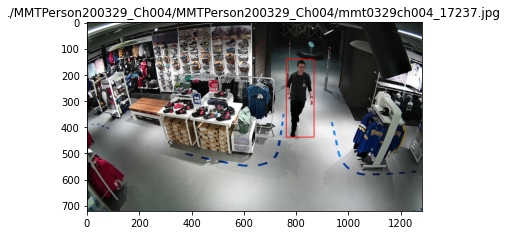

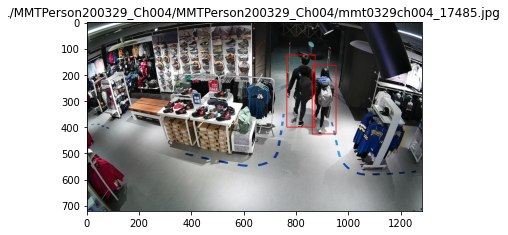

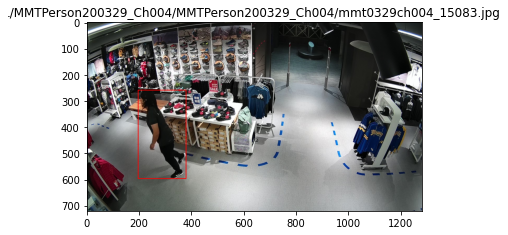

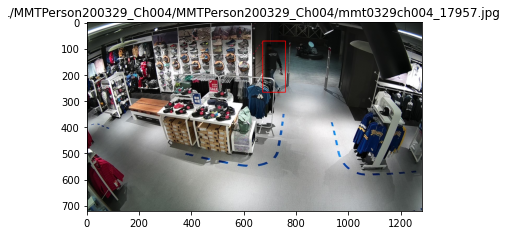

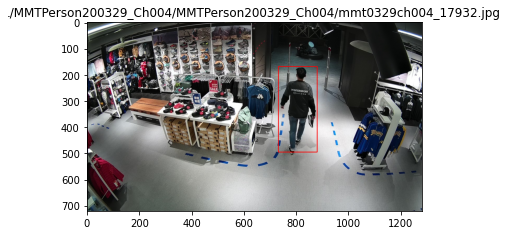

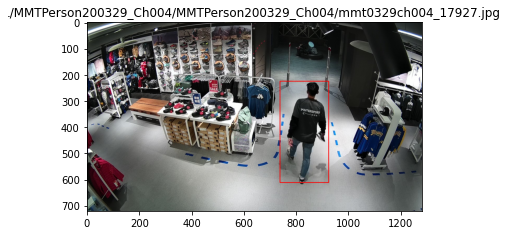

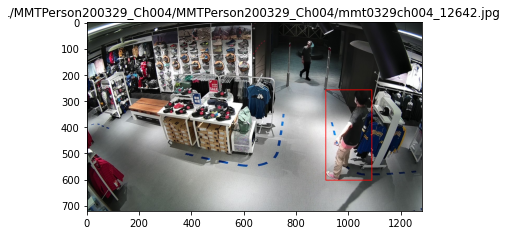

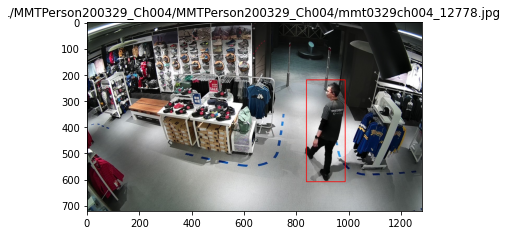

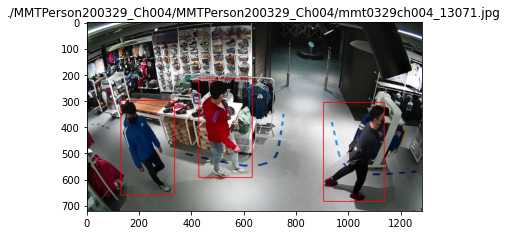

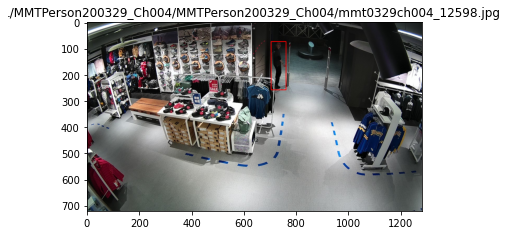

In [62]:
import cv2

red = (255, 0, 0)

fns = list(annoidx.keys())
for _ in range(10):
    imgfn=random.choice(fns)
    fn = imgroot+imgfn
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for aid,bbox in annoidx[imgfn].items():
        [x1,y1,x2,y2] = bbox        
        cv2.rectangle(img, (x1,y1), (x2,y2), color=red, thickness=2)
    plt.figure()
    plt.title(fn)
    plt.imshow(img)
